In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle # Make a directory
!cp kaggle.json ~/.kaggle # Copy to the directory
!chmod 600 ~/.kaggle/ kaggle.json

In [ ]:
!kaggle datasets download -d ismailpromus/skin-diseases-image-dataset

100% 5.19G/5.19G [04:38<00:00, 21.6MB/s]
100% 5.19G/5.19G [04:38<00:00, 20.0MB/s]


In [ ]:
!mkdir input #bikin directory 'input'
!unzip skin-diseases-image-dataset.zip -d input #unzip file di directory input

Streaming output truncated to the last 5000 lines.
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-65.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-66.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-67.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-69.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-7.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-70.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k/t-Lichen-Sclerosus-Skin-71.jpg  
  inflating: input/IMG_CLASSES/7. Psoriasis pictures Lichen Planus a

In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
import os

os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')

In [ ]:
loc = "input/IMG_CLASSES" 
splitfolders.ratio(loc,output = "output",seed = 42,ratio = (0.80,.1,.1))

Copying files: 27153 files [01:08, 393.65 files/s] 


In [ ]:
DATASET_PATH = 'input/IMG_CLASSES'

os.listdir(DATASET_PATH)

['1. Eczema 1677',
 '4. Basal Cell Carcinoma (BCC) 3323',
 '8. Seborrheic Keratoses and other Benign Tumors - 1.8k',
 '7. Psoriasis pictures Lichen Planus and related diseases - 2k',
 '10. Warts Molluscum and other Viral Infections - 2103',
 '5. Melanocytic Nevi (NV) - 7970',
 '6. Benign Keratosis-like Lesions (BKL) 2624',
 '3. Atopic Dermatitis - 1.25k',
 '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k',
 '2. Melanoma 15.75k']

In [ ]:
TRAINING_DIR = 'output/train'
VALIDATION_DIR = 'output/val'
TEST_DIR = 'ouput/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 64,
                                                      class_mode = 'categorical',
                                                      target_size = (300, 300))

    

validation_datagen = ImageDataGenerator(rescale = 1./255.,
                                        rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        fill_mode = 'nearest')


validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 64,
                                                                class_mode = 'categorical',
                                                                target_size = (300, 300))

Found 21719 images belonging to 10 classes.
Found 2711 images belonging to 10 classes.


In [ ]:
model = tf.keras.models.Sequential([ 

        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(), 

        tf.keras.layers.Dense(1024, activation='relu'), 
        tf.keras.layers.Dense(512, activation='relu'), 
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),
                                                include_top=False,
                                                weights='imagenet')

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs = base_model.input, outputs = outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 50,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
50/50 [==============================] - 254s 4s/step - loss: 1.3887 - accuracy: 0.4809 - val_loss: 1.2267 - val_accuracy: 0.5622
Epoch 2/30
50/50 [==============================] - 195s 4s/step - loss: 0.9731 - accuracy: 0.6134 - val_loss: 1.1781 - val_accuracy: 0.5666
Epoch 3/30
50/50 [==============================] - 200s 4s/step - loss: 0.8447 - accuracy: 0.6755 - val_loss: 0.9817 - val_accuracy: 0.6234
Epoch 4/30
50/50 [==============================] - 199s 4s/step - loss: 0.7860 - accuracy: 0.7050 - val_loss: 0.8923 - val_accuracy: 0.6828
Epoch 5/30
50/50 [==============================] - 196s 4s/step - loss: 0.7312 - accuracy: 0.7172 - val_loss: 0.8682 - val_accuracy: 0.6842
Epoch 6/30
50/50 [==============================] - 191s 4s/step - loss: 0.7279 - accuracy: 0.7300 - val_loss: 0.7932 - val_accuracy: 0.7104
Epoch 7/30
50/50 [==============================] - 190s 4s/step - loss: 0.6796 - accuracy: 0.7397 - val_loss: 0.8076 - val_accuracy: 0.7075
Epoch 8/30
50

In [ ]:
#history = model.fit(train_generator,
#                    steps_per_epoch = 50,
#                    epochs=30,
#                    validation_data=validation_generator)

Epoch 1/30
50/50 [==============================] - 187s 4s/step - loss: 2.0064 - accuracy: 0.3284 - val_loss: 1.6749 - val_accuracy: 0.4061
Epoch 2/30
50/50 [==============================] - 182s 4s/step - loss: 1.6179 - accuracy: 0.4056 - val_loss: 1.5551 - val_accuracy: 0.4257
Epoch 3/30
50/50 [==============================] - 181s 4s/step - loss: 1.5737 - accuracy: 0.4080 - val_loss: 1.5503 - val_accuracy: 0.3973
Epoch 4/30
50/50 [==============================] - 183s 4s/step - loss: 1.4733 - accuracy: 0.4491 - val_loss: 1.4767 - val_accuracy: 0.4548
Epoch 5/30
50/50 [==============================] - 181s 4s/step - loss: 1.4305 - accuracy: 0.4797 - val_loss: 1.6275 - val_accuracy: 0.4220
Epoch 6/30
50/50 [==============================] - 181s 4s/step - loss: 1.4634 - accuracy: 0.4625 - val_loss: 1.4161 - val_accuracy: 0.4718
Epoch 7/30
50/50 [==============================] - 182s 4s/step - loss: 1.4076 - accuracy: 0.4881 - val_loss: 1.3660 - val_accuracy: 0.5175
Epoch 8/30
50

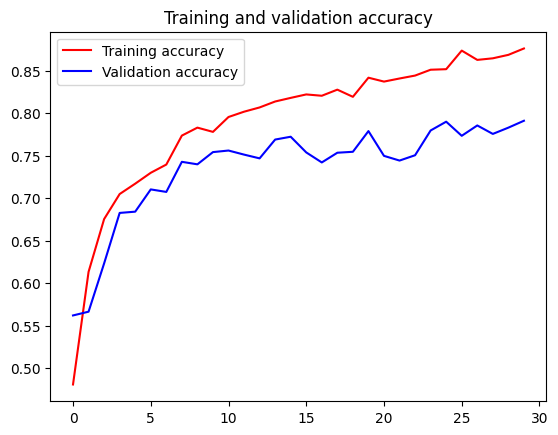

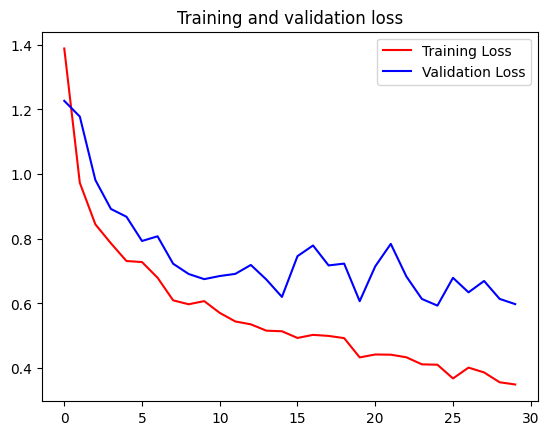

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
#epochs = np.arange(100)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
model_name = 'Skinease_3_1.h5'

model.save(model_name)

In [21]:
from google.colab import files
files.download(model_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>